# Fashion-MNIST

1. Imports


In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2022-09-28 16:10:05.190213: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-28 16:10:05.358970: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-09-28 16:10:05.364409: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-28 16:10:05.364428: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

2.10.0


2. Data


train_images.shape:  (60000, 28, 28)
train_labels:  [9 0 0 ... 3 0 5]


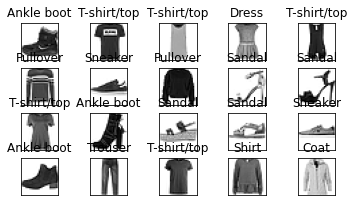

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print("train_images.shape: ", train_images.shape)

print("train_labels: ", train_labels)

label_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

train_images = train_images / 255.0

test_images = test_images / 255.0

for i in range(20):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.title(label_names[train_labels[i]])


3. Define and train model


In [3]:
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(10, activation="softmax"),
    ]
)

model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

model.fit(train_images, train_labels, epochs=10)


2022-09-28 16:10:09.645716: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-28 16:10:09.645784: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-28 16:10:09.645805: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (SV9R1HQ93): /proc/driver/nvidia/version does not exist
2022-09-28 16:10:09.646247: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4948 - accuracy: 0.8270
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3735 - accuracy: 0.8655
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3367 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3109 - accuracy: 0.8854
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2920 - accuracy: 0.8918
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2788 - accuracy: 0.8970
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2657 - accuracy: 0.9031
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2552 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2451 - accuracy: 0.9080
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.237

4. Evaluation


313/313 - 1s - loss: 0.3343 - accuracy: 0.8843 - 590ms/epoch - 2ms/step
Test accuracy:  0.8842999935150146
313/313 [==============================] - 1s 2ms/step


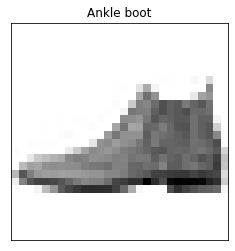

In [4]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print("Test accuracy: ", test_acc)

prediction = model.predict(test_images)


plt.figure()
plt.imshow(test_images[0], cmap=plt.cm.binary)
plt.title(label_names[np.argmax(prediction[0])])
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()
